# BagOfWords approach for classification

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import string

In [21]:
ENGLISH_STOP_WORDS = {'all', 'both', 'am', 'themselves', 'often', 'if', 'becoming', 'thence', 'while', 've', 'couldn', 'mostly', 'ma', 'more', 'de', 'thin', 'seems', 'do', 'sometime', 'across', 'nine', 'namely', 'hers', 'amoungst', 'needn', 'sixty', 'what', 'why', 'nevertheless', 'co', 'mustn', 'bottom', 'although', 'own', 'having', 'was', 'cant', 'from', 'll', 'etc', 'on', 'herself', 'had', 'beforehand', 'empty', 'they', 'less', 'seem', 'hasnt', 'he', 'serious', 'himself', 'whereafter', 'is', 'over', 'became', 'give', 'below', 'ain', 'yourselves', 'each', 'anyhow', 'one', 'moreover', 'where', 'might', 'already', 're', 'until', 'that', 'theirs', 'anywhere', 'other', 'through', 'should', 'at', 'fifteen', 'sometimes', 'bill', 'upon', 'describe', 'perhaps', 'after', 'there', 'not', 'whereas', 'around', 'this', 'eg', 'call', 'ours', 'can', 'who', 'besides', 'same', 'to', 'seemed', 'your', 'thick', 'whereupon', 'anyone', 'when', 'wasn', 'whoever', 'haven', 'be', 'either', 'rather', 'inc', 'has', 'ie', 'twenty', 'amongst', 'about', 'none', 'however', 'the', 'system', 'been', 'still', 'otherwise', 'two', 'whenever', 'their', 'because', 'but', 'y', 'for', 'former', 'which', 'due', 'i', 'does', 'onto', 'him', 'five', 'doesn', 'nowhere', 'of', 'those', 'behind', 'hereupon', 'latter', 'too', 'move', 'us', 'them', 'just', 'as', 'everything', 'any', 'everywhere', 'it', 'get', 'hadn', 'much', 'find', 'something', 'won', 'always', 'fire', 'couldnt', 'ourselves', 'yet', 'almost', 'now', 'twelve', 'mightn', 'o', 'under', 'some', 'no', 'eight', 'somewhere', 'together', 'anything', 'within', 'don', 'beside', 'most', 'mill', 'nothing', 'sincere', 'per', 'many', 'nor', 'thru', 'into', 'beyond', 'have', 'than', 'weren', 'therein', 'ten', 'its', 'take', 'towards', 'very', 'with', 'm', 'cry', 'also', 'were', 'since', 'ltd', 'whose', 'several', 'between', 'how', 'become', 'itself', 'here', 'formerly', 'in', 'back', 'becomes', 'thereupon', 'else', 'didn', 'third', 'without', 'name', 'whence', 'among', 'ever', 'first', 'keep', 'made', 'you', 'least', 'amount', 'an', 'except', 'whole', 'up', 'next', 'fify', 'someone', 'aren', 'interest', 'others', 'part', 'noone', 'throughout', 'found', 'thereafter', 'thus', 'must', 'yours', 'only', 'by', 'wherever', 'during', 'her', 'could', 'cannot', 'full', 'd', 'hundred', 'myself', 'herein', 'seeming', 'or', 'isn', 'elsewhere', 'side', 'well', 'then', 'done', 'hereby', 'may', 'off', 'go', 'being', 'once', 'put', 'indeed', 'enough', 'con', 'please', 'eleven', 'few', 'whereby', 'my', 'whether', 'detail', 'meanwhile', 'our', 'so', 'another', 'such', 'see', 'down', 'shan', 'neither', 'hence', 'will', 'never', 'mine', 'wouldn', 'somehow', 'whither', 'every', 'even', 'a', 'along', 'front', 'hereafter', 'are', 'forty', 'nobody', 'before', 'therefore', 'we', 'fill', 'four', 'three', 'alone', 'hasn', 't', 'afterwards', 'yourself', 'would', 'shouldn', 'six', 'against', 'anyway', 'wherein', 'doing', 'last', 'again', 'me', 'his', 'and', 'whom', 'whatever', 'thereby', 'she', 'above', 'further', 'these', 'top', 'via', 'though', 'out', 'un', 's', 'show', 'toward', 'everyone', 'latterly', 'did'}

In [22]:
#Function for basic cleaning/preprocessing texts
def clean(doc):
    # Removal of punctuation marks (.,/\][{} etc) and numbers
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    # Removal of stopwords
    doc = " ".join([token for token in doc.split() if token not in ENGLISH_STOP_WORDS])
    return doc.lower()

In [23]:
# MODELS for text classification

models = {
    "Logistic Regression": LogisticRegression(),
    "Multinomial Naive Bayes": MultinomialNB(),
}


In [24]:
csvFile = "D:\\Alerta Backup Data\\gonzalo_data\\datasets\\text\\text.xlsx"

In [25]:
df = pd.read_excel(csvFile)

In [26]:
df

,class,text
0,0,© From your Google Drive Interview-Mode BK99 S...
1,1,S Cc @ amazon.com/gp/bestsellers/?ref_=nav_cs_...
2,0,© From your Google Drive Interview-Mode BK99 S...
3,1,S Cc @ amazon.com/gp/bestsellers/?ref_=nav_cs_...
4,0,© From your Google Drive Interview-Mode BK99 S...
5,1,S Cc @ amazon.com/gp/bestsellers/?ref_=nav_cs_...


In [27]:
vectorizer = CountVectorizer(preprocessor=clean)
# Create sample set of documents
docs = df.text.to_numpy()

In [28]:
# Fit the bag-of-words model
bag = vectorizer.fit_transform(docs)
bag.shape

(6, 302)

In [29]:
# Get unique words / tokens found in all the documents. The unique words / tokens represents
# the features
print(len(vectorizer.get_feature_names_out()))

302


In [30]:
# Associate the indices with each unique word
print(vectorizer.vocabulary_)

{'from': 106, 'google': 114, 'drive': 82, 'interviewmode': 136, 'bk': 31, 'ses': 223, 'es': 91, 'session': 224, 'canvas': 42, 'sion': 239, 'oc': 176, 'go': 113, 'my': 167, 'web': 284, 'store': 251, 'add': 2, 'shortcut': 234, 'gm': 112, 'image': 133, 'account': 1, 'dashboard': 74, 'calendar': 39, 'oe': 177, 'commons': 63, 'help': 123, 'ie': 131, 'assignments': 19, 'virginiacommonwealthinstructure': 280, 'adob': 5, 'mec': 154, 'hal': 119, 'adi': 4, 'je': 137, 'alg': 7, 'ra': 209, 'eativ': 84, 'ort': 184, 'cmsc': 57, 'computational': 64, 'geometry': 109, 'due': 83, 'monday': 158, 'prr': 207, 'here': 125, 'slide': 242, 'lecture': 144, 'pre': 203, 'signme': 238, 'cor': 66, 'points': 200, 'none': 174, 'next': 173, 'cc': 47, 'amazoncomgpbestsellersrefnavcsbestsellers': 11, 'ooo': 181, 'guest': 118, 'hello': 122, 'sign': 237, 'returns': 214, 'amazon': 10, 'all': 8, 'search': 219, 'en': 89, 'orders': 182, 'nu': 175, 'select': 220, 'address': 3, 'lists': 146, 'cart': 45, 'onemedical': 180, 'clin

In [31]:
# Print the numerical feature vector
print(bag.toarray())

[[0 1 1 ... 0 0 0]
 [3 1 0 ... 1 2 2]
 [0 1 1 ... 0 0 0]
 [3 1 0 ... 1 2 2]
 [0 1 1 ... 0 0 0]
 [3 1 0 ... 1 2 2]]


In [32]:
tfidf_transformer = TfidfTransformer()
bag_tfidf = tfidf_transformer.fit_transform(bag)
bag_tfidf.shape

(6, 302)

In [33]:
# Creating training data
X = bag_tfidf.toarray()
y = df["class"].to_numpy()

In [34]:
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Choose a model

In [35]:
model_name = "Logistic Regression" # "Logistic Regression" or "Multinomial Naive Bayes"
model = models[model_name]

In [36]:
# Fit the model
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
# Create the predictions
y_predict = model.predict(X_test)

Model accuracy:  0.0
Model precision:  0.0
Model recall:  0.0
Model f1-score:  0.0


c:\Users\Gonzalo\anaconda3\envs\MLADHD_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


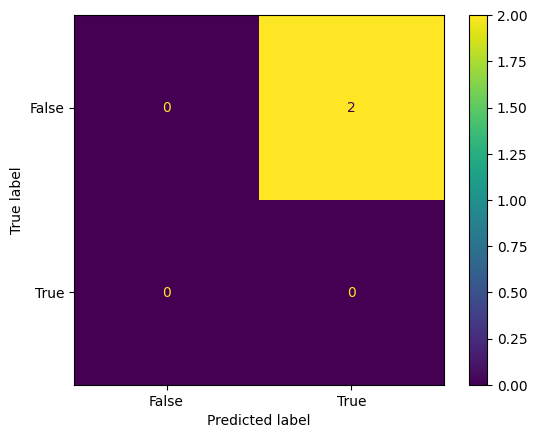

In [41]:
# Compute the accuracy, precision, recall and f1-score
print("Model accuracy: ", metrics.accuracy_score(y_test, y_predict))
print("Model precision: ", metrics.precision_score(y_test, y_predict))
print("Model recall: ", metrics.recall_score(y_test, y_predict))
print("Model f1-score: ", metrics.f1_score(y_test, y_predict))
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
# Visualize the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## Interpretability

In [42]:
# Assigning the feature names to an empty list
feat_impts = [vectorizer.get_feature_names_out()]
#For all the models save the feature importances in the estimators list would give the internal models used by the #multioutput regressor
for clf in model.coef_:
    #For each model in the estimators list, save the feature importances in the feat_impts list
    feat_impts.append(clf)

In [43]:
#Saving the coefficients in a dataframe
df_feats_impts = pd.DataFrame(np.transpose(np.array(feat_impts)), columns = ["word", "distracted"])

In [44]:
df_feats_impts

,word,distracted
0,accessories,0.045123
1,account,-0.035922
2,add,-0.071065
3,address,0.015041
4,adi,-0.071065
...,...,...
297,xl,0.015041
298,xs,0.015041
299,yoke,0.015041
300,yy,0.030082


In [45]:
#Creating Individual Feature Importance table by sorting on specific toxic-type column and selecting top 5 words
focused_fi = df_feats_impts[["word","distracted"]].sort_values(by = "distracted", ascending = False).head(20)

In [46]:
focused_fi

,word,distracted
294,womens,0.240654
10,amazon,0.165449
80,dress,0.150409
253,summer,0.120327
222,sellers,0.120327
30,best,0.120327
46,casual,0.120327
81,dresses,0.105286
259,te,0.105286
240,sleeve,0.090245
